### AEGIS galaxy image and catalog in V and I bands
Final catalog located at /nfs/slac/g/ki/ki19/deuce/AEGIS/AEGIS_full/AEGIS_training_sample/

In [13]:
import galsim
from astropy.table import Table,vstack, Column
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import functions as fn

In [2]:
filters=['f606w', 'f814w']
file_filter_name = ['V', 'I']
main_path = '/nfs/slac/g/ki/ki19/deuce/AEGIS/AEGIS_full2/AEGIS_training_sample/'
cat_name = 'AEGIS_galaxy_catalog_filter_25.2.fits'
colors=['b','r','g']

## Open with galsim.RealGalaxyCatalog( )

In [3]:
rgc={}
for f , filt in enumerate(filters):
    name = main_path + cat_name.replace('filter', file_filter_name[f])
    rgc[filt] = galsim.RealGalaxyCatalog(name,
                                   dir=main_path)

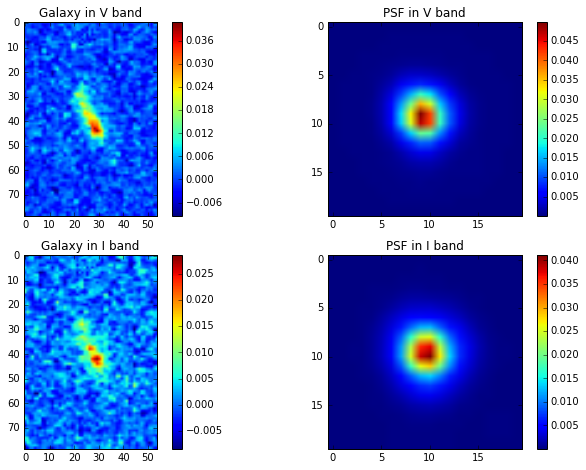

In [4]:
id =14344
plt.figure(1,figsize=[12,16])
plt.subplot(4,2,1)
plt.imshow(rgc['f606w'].getGal(id).array)
plt.title('Galaxy in V band')
plt.colorbar()
plt.subplot(4,2,2)
plt.imshow(rgc['f606w'].getPSF(id).array)
plt.title('PSF in V band')
plt.colorbar()
plt.figure(1,figsize=[10,10])
plt.subplot(4,2,3)
plt.imshow(rgc['f814w'].getGal(id).array)
plt.title('Galaxy in I band')
plt.colorbar()
plt.subplot(4,2,4)
plt.imshow(rgc['f814w'].getPSF(id).array)
plt.title('PSF in I band')
plt.colorbar()

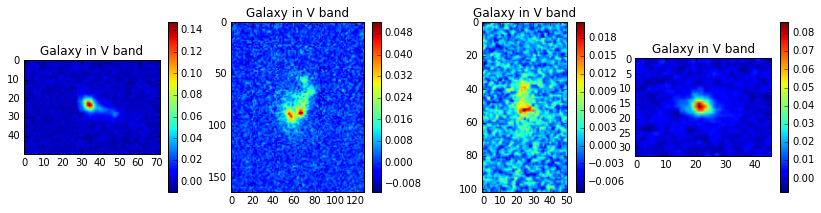

In [5]:
plt.figure(1,figsize=[14,14])
plt.subplot(4,4,1)
plt.imshow(rgc['f606w'].getGal(110).array)
plt.title('Galaxy in V band')
plt.colorbar()
plt.subplot(4,4,2)
plt.imshow(rgc['f606w'].getGal(0).array)
plt.title('Galaxy in V band')
plt.colorbar()
plt.subplot(4,4,3)
plt.imshow(rgc['f606w'].getGal(410).array)
plt.title('Galaxy in V band')
plt.colorbar()
plt.subplot(4,4,4)
plt.imshow(rgc['f606w'].getGal(17410).array)
plt.title('Galaxy in V band')
plt.colorbar()

27392 galaxies passed COSMOS cuts out of 29105 in V band
27726 galaxies passed COSMOS cuts out of 29105 in I band


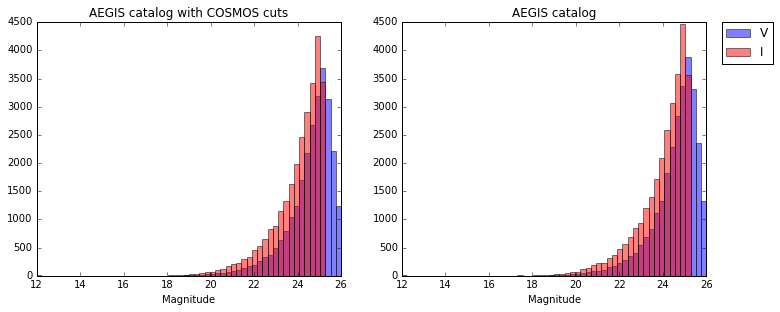

In [6]:
cc, good={},{}
plt.figure(1,figsize=[12,10])
for f , filt in enumerate(filters):
    name = main_path + cat_name.replace('filter', file_filter_name[f])
    cc[filt] = galsim.COSMOSCatalog(file_name = name, dir=main_path, exclusion_level="bad_stamp")
    plt.subplot(2,2,1)
    plt.title('AEGIS catalog with COSMOS cuts')
    plt.xlabel('Magnitude')
    good[f]=[cc[filt].getOrigIndex(idx) for idx in range(cc[filt].getNObjects())]
    plt.hist(rgc[filt].mag[good[f]], np.linspace(12,26,59), alpha =0.5, color = colors[f] , label = file_filter_name[f] )
    plt.subplot(2,2,2)
    plt.title('AEGIS catalog')
    plt.xlabel('Magnitude')
    plt.hist(rgc[filt].mag, np.linspace(12,26,59), alpha =0.5, color = colors[f] , label = file_filter_name[f] )
    print "{0} galaxies passed COSMOS cuts out of {1} in {2} band".format(cc[filt].getNObjects(),cc[filt].getNTot(),file_filter_name[f])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

27392 galaxies passed COSMOS cuts out of 29105 in V band
27726 galaxies passed COSMOS cuts out of 29105 in I band


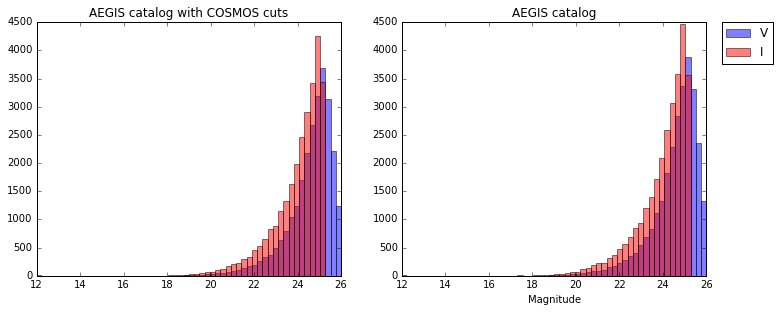

In [7]:
cc, good={},{}
plt.figure(1,figsize=[12,10])
for f , filt in enumerate(filters):
    name = main_path + cat_name.replace('filter', file_filter_name[f])
    cc[filt] = galsim.COSMOSCatalog(file_name = name, dir=main_path)
    plt.subplot(2,2,1)
    plt.title('AEGIS catalog with COSMOS cuts')
    good[f]=[cc[filt].getOrigIndex(idx) for idx in range(cc[filt].getNObjects())]
    plt.hist(rgc[filt].mag[good[f]], np.linspace(12,26,59), alpha =0.5, color = colors[f] , label = file_filter_name[f] )
    plt.subplot(2,2,2)
    plt.title('AEGIS catalog')
    plt.xlabel('Magnitude')
    plt.hist(rgc[filt].mag, np.linspace(12,26,59), alpha =0.5, color = colors[f] , label = file_filter_name[f] )
    print "{0} galaxies passed COSMOS cuts out of {1} in {2} band".format(cc[filt].getNObjects(),cc[filt].getNTot(),file_filter_name[f])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Main catalog

In [8]:
cat_main, cat_selec, cat_fits={},{},{}
for f , filt in enumerate(filters):
    main_name = 'AEGIS_galaxy_catalog_filter_25.2.fits'.replace('filter', file_filter_name[f] )
    selec_name = 'AEGIS_galaxy_catalog_filter_25.2_selection.fits'.replace('filter', file_filter_name[f] )
    fits_name = 'AEGIS_galaxy_catalog_filter_25.2_fits.fits'.replace('filter', file_filter_name[f] )
    cat_main[f] = Table.read(main_path + main_name, format='fits')
    cat_selec[f] = Table.read(main_path + selec_name, format='fits')
    cat_fits[f] = Table.read(main_path + fits_name, format='fits')
    print "Total Number of objects in " , file_filter_name[f], 'band is', len(cat_main[f])

Total Number of objects in  V band is 29105
Total Number of objects in  I band is 29105


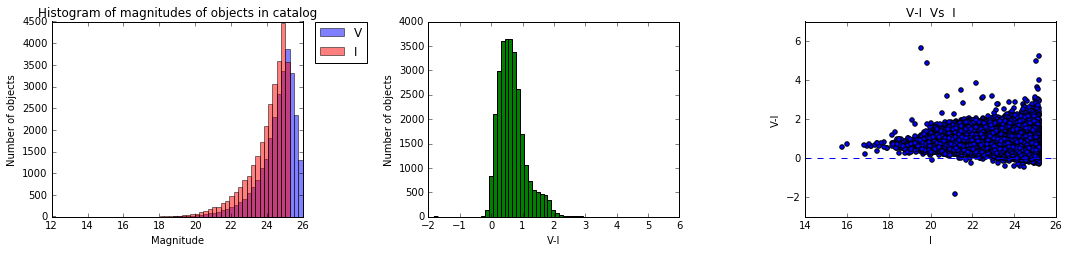

In [9]:
plt.figure(1,figsize=[18,14])
plt.subplots_adjust(wspace = 0.5)
plt.subplots_adjust(hspace = 0.5)
plt.subplot(3,3,1)
for f , filt in enumerate(filters):
    plt.hist(cat_main[f]['MAG'], np.linspace(12,26,59), alpha =0.5, color = colors[f] , label = file_filter_name[f] )
    plt.xlabel('Magnitude')
    plt.ylabel('Number of objects')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Histogram of magnitudes of objects in catalog')

plt.subplot(3,3,2)
plt.hist(cat_main[0]['MAG']-cat_main[1]['MAG'],60, color = colors[2] , label = file_filter_name[f] )
plt.ylabel('Number of objects')
plt.xlabel('V-I')

plt.subplot(3,3,3)
plt.scatter(cat_main[1]['MAG'], cat_main[0]['MAG']-cat_main[1]['MAG'] )
plt.title('V-I  Vs  I')
plt.xlabel('I')
plt.ylabel('V-I')
plt.axhline(y=0, linestyle='--')
plt.savefig('AEGIS_magnitude.png',bbox_inches='tight')

Number of objects with redshift  3763


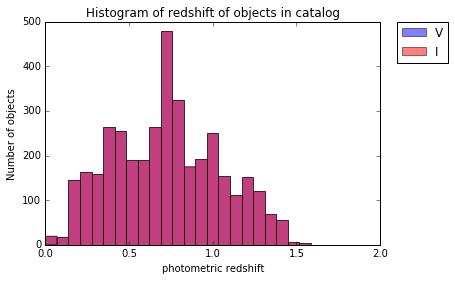

In [10]:
for f , filt in enumerate(filters):
    plt.hist(cat_fits[f]['zphot'], np.linspace(0,2,30), alpha =0.5, color = colors[f] , label = file_filter_name[f] )
    plt.xlabel('photometric redshift')
    plt.ylabel('Number of objects')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Histogram of redshift of objects in catalog')
print "Number of objects with redshift ", sum([cat_fits[f]['zphot']>=0][0])

## Without COSMOSCatalog Selection


/nfs/slac/g/ki/ki19/jmeyers3/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:30: RuntimeWarning: divide by zero encountered in double_scalars


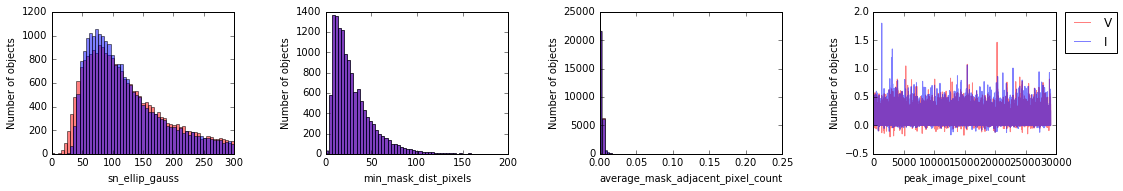

In [38]:
plt.figure(1,figsize=[18,14])
plt.subplots_adjust(wspace = 0.5)
plt.subplots_adjust(hspace = 0.5)
plt.subplot(4,4,1)
for f , filt in enumerate(filters):
    plt.hist(cat_selec[f]['sn_ellip_gauss'],np.linspace(0,300,60), alpha =0.5, color = colors[f] , label = file_filter_name[f] )
    plt.xlabel('sn_ellip_gauss')
    plt.ylabel('Number of objects')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.title('Histogram of redshift of objects in catalog')
    
plt.subplot(4,4,2)
for f , filt in enumerate(filters):
    plt.hist(cat_selec[f]['min_mask_dist_pixels'],np.linspace(0,200,60), alpha =0.5, color = colors[f] , label = file_filter_name[f] )
    plt.xlabel('min_mask_dist_pixels')
    plt.ylabel('Number of objects')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.title('Histogram of redshift of objects in catalog')

plt.subplot(4,4,3)
for f , filt in enumerate(filters):
    plt.hist(cat_selec[f]['average_mask_adjacent_pixel_count'],np.linspace(0,0.2,60), alpha =0.5, color = colors[f] , label = file_filter_name[f] )
    plt.xlabel('average_mask_adjacent_pixel_count')
    plt.ylabel('Number of objects')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.title('Histogram of redshift of objects in catalog')

plt.subplot(4,4,4)
for f , filt in enumerate(filters):
    y = [cat_selec[f]['average_mask_adjacent_pixel_count'][i]/float(cat_selec[f]['peak_image_pixel_count'][i]) for i in range(len(cat_selec[f])) ]
    plt.plot(y,  alpha =0.5, color = colors[f] , label = file_filter_name[f] )
    plt.xlabel('peak_image_pixel_count')
    plt.ylabel('Number of objects')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.title('Histogram of redshift of objects in catalog')

## With COSMOSCatalog Selection
selection cuts in COSMOSCatalog: 

1. SNR>17
2. min_mask_dist_pixels >11
3. average_mask_adjacent_pixel_count< 0.2 peak_image_pixel_count

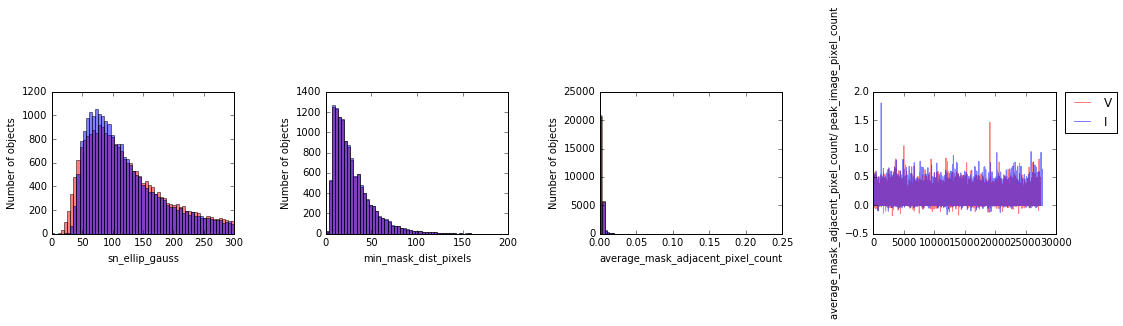

In [52]:
plt.figure(1,figsize=[18,14])
plt.subplots_adjust(wspace = 0.5)
plt.subplots_adjust(hspace = 0.5)
plt.subplot(4,4,1)
for f , filt in enumerate(filters):
    plt.hist(cat_selec[f]['sn_ellip_gauss'][good[f]],np.linspace(0,300,60), alpha =0.5, color = colors[f] , label = file_filter_name[f] )
    plt.xlabel('sn_ellip_gauss')
    plt.ylabel('Number of objects')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.title('Histogram of redshift of objects in catalog')
    
plt.subplot(4,4,2)
for f , filt in enumerate(filters):
    plt.hist(cat_selec[f]['min_mask_dist_pixels'][good[f]],np.linspace(0,200,60), alpha =0.5, color = colors[f] , label = file_filter_name[f] )
    plt.xlabel('min_mask_dist_pixels')
    plt.ylabel('Number of objects')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.title('Histogram of redshift of objects in catalog')

plt.subplot(4,4,3)
for f , filt in enumerate(filters):
    plt.hist(cat_selec[f]['average_mask_adjacent_pixel_count'][good[f]],np.linspace(0,0.2,60), alpha =0.5, color = colors[f] , label = file_filter_name[f] )
    plt.xlabel('average_mask_adjacent_pixel_count')
    plt.ylabel('Number of objects')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.title('Histogram of redshift of objects in catalog')

plt.subplot(4,4,4)
for f , filt in enumerate(filters):
    a = cat_selec[f]['average_mask_adjacent_pixel_count'][good[f]]
    b = cat_selec[f]['peak_image_pixel_count'][good[f]]
    y = [a[i]/float(b[i]) for i in range(len(a))]   
    plt.plot(y,  alpha =0.5, color = colors[f] , label = file_filter_name[f] )
    plt.ylabel('average_mask_adjacent_pixel_count/ peak_image_pixel_count')
    #plt.ylabel('Number of objects')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.title('Histogram of redshift of objects in catalog')

In [46]:
cat_selec[f]['average_mask_adjacent_pixel_count'][good[f]][i]

0.0029881434828793216

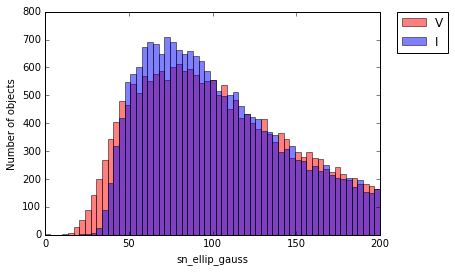

In [33]:
for f , filt in enumerate(filters):
    plt.hist(cat_selec[f]['sn_ellip_gauss'][good[f]], np.linspace(0,200,60), alpha =0.5, color = colors[f] , label = file_filter_name[f] )
    plt.xlabel('sn_ellip_gauss')
    plt.ylabel('Number of objects')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### My catalog

In [18]:
path = '/nfs/slac/g/ki/ki19/deuce/AEGIS/AEGIS_full2/'
cat_comp={}
for f , filt in enumerate(filters):
    comp_name = 'complete_AEGIS_galaxy_catalog_filter_25.2.fits'.replace('filter', file_filter_name[f] )
    cat_comp[f] = Table.read(path + comp_name, format='fits')
idx_name = 'index_table_AEGIS_galaxy_catalog__25.2.fits'
#cat_idx = Table.read(path + idx_name, format='fits')


Number of objects with ACS catlog magnitude in V band : 27290
Number of objects with ACS catlog magnitude in I band : 27289


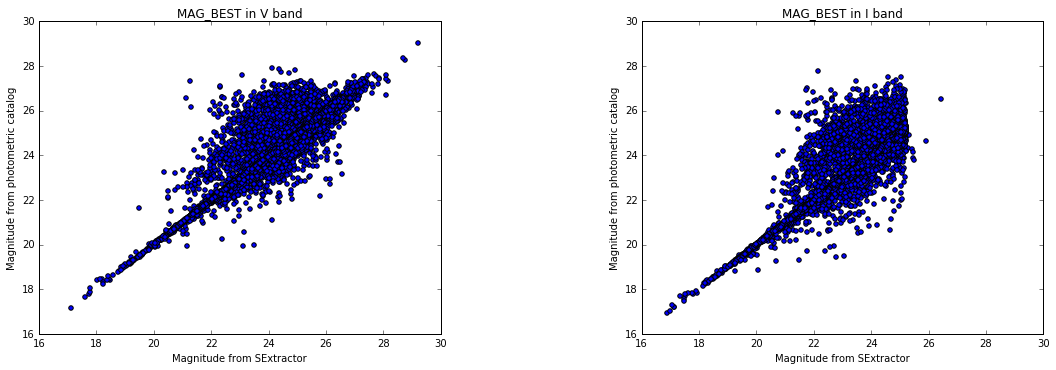

In [30]:
plt.figure(1,figsize=[18,14])
plt.subplots_adjust(wspace = 0.5)
plt.subplots_adjust(hspace = 0.5)

for f , filt in enumerate(filters):
    plt.subplot(2,2,f+1)
    cat_mag = cat_comp[f]['ACS_'+ file_filter_name[f]+'BEST']
    plt.scatter(cat_comp[f]['MAG_BEST'], cat_mag)
    plt.xlim([16,30])
    plt.ylim([16,30])
    plt.xlabel('Magnitude from SExtractor')
    plt.ylabel('Magnitude from photometric catalog')
    plt.title('MAG_BEST in {0} band'.format(file_filter_name[f]))
    print "Number of objects with ACS catlog magnitude in {0} band : {1}".format(file_filter_name[f],sum([(cat_mag>=16) & (cat_mag<=40)][0]))  

## Image Reduction 

In [12]:
def plot_focus(seg_id, filt, main_path='/nfs/slac/g/ki/ki19/deuce/AEGIS/AEGIS_full/'):
    plt.figure(1,figsize=[12,16])
    plt.subplots_adjust(wspace = 0.3)
    plt.subplots_adjust(hspace = 0.3)
    file_name = main_path + str(seg_id) +'/' + filt + '_cost_fn.txt'
    cost_fn=np.loadtxt(file_name)
    file_name = main_path + str(seg_id) +'/' + filt + '_focus_with_num_stars.txt'
    foc = np.loadtxt(file_name)
    plt.subplot(4,2,1)
    plt.axvline(x=foc[-1][1],color='k', linestyle='--')
    plt.plot(cost_fn.T[0],cost_fn.T[1], 'o')
    plt.xlabel('focus position')
    plt.ylabel('cost function')
    plt.title('Focus = {0}  with {1} stars for seg {2} in filter {3}'.format(a[-1][1], int(a[-1][0]), seg_id,filt))
    plt.xlim([-10,5])
    
    plt.subplot(4,2,2)
    plt.axhline(y=foc[-1][1],color='k', linestyle='--')
    plt.plot(foc.T[0],foc.T[1], 's')
    plt.xlabel('Number of stars')
    plt.ylabel('Focus')
    plt.title('Focus vs no of stars used for seg {0} in filter {1}'.format(seg_id,filt))
    plt.ylim([-10,5])

    
def sep_line(sep_weights):
    x0 = 15
    y0 = sep_weights[1]
    x1 = sep_weights[0]
    y1 = sep_weights[1]
    x2 = 25
    y2 = sep_weights[2]*(x2-x1) + y1
    return (x0,y0,x1,y1,x2,y2)

seg_file = '/nfs/slac/g/ki/ki19/deuce/AEGIS/unzip/seg_ids.txt'
filters=['f606w', 'f814w']
file_filter_name = ['V', 'I']
main_path='/nfs/slac/g/ki/ki19/deuce/AEGIS/AEGIS_full/'
colors =['r', 'b', 'g', 'c', 'y']

###  Star-Galaxy seperation

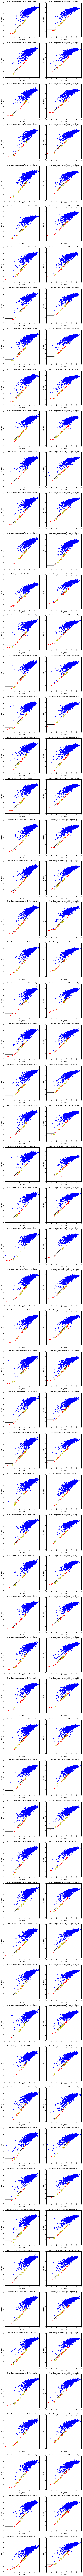

In [14]:
all_seg_ids = np.loadtxt(seg_file, delimiter=" ",dtype='S2')
sep_weights = [(19.4, 15.508, 0.945), (18.9, 14.955, 0.98)]
count=1
plt.figure(1,figsize=[12,802])
plt.subplots_adjust(wspace = 0.2)
plt.subplots_adjust(hspace = 0.2)
for i, seg_id in enumerate(all_seg_ids):
    stars = np.zeros([2,])
    gal={}
    focus_stars={}
    for f, filter in enumerate(filters):
        #points for sep line
        x0 = 15
        y0 = sep_weights[f][1]
        x1 = sep_weights[f][0]
        y1 = y0
        slope = sep_weights[f][2]
        intercept = y1 - slope*x1
        x2 = 25
        y2 = slope*x2 + intercept
        #x3 = 25
        #y3 = 0
        file_name = main_path + str(seg_id) +'/' + filter + '_clean.cat'
        catalog = Table.read(file_name, format='ascii.basic')
        q, = np.where(catalog['IS_STAR']==1)
        stars = [catalog['MAG_AUTO'][q], catalog['MU_MAX'][q]]
        q, = np.where(catalog['IS_STAR']==0)
        gals = [catalog['MAG_AUTO'][q], catalog['MU_MAX'][q]]
        q = np.array((np.loadtxt(main_path + seg_id +'/' + filter + '_matched_stars.txt'))[0],dtype='int')
        focus_stars = [catalog['MAG_AUTO'][q], catalog['MU_MAX'][q], catalog['NUMBER'][q]]        
        plt.subplot(2*len(all_seg_ids),2,count)
        plt.scatter(stars[0],stars[1], color='red')
        plt.scatter(gals[0],gals[1], color='blue')
        plt.scatter(focus_stars[0],focus_stars[1], s=80, facecolors='none', edgecolors='y')
        plt.xlabel('MAG_AUTO')
        plt.ylabel('MU_MAX')
        #for i, txt in enumerate(focus_stars[2]):
        #    plt.annotate(txt, (focus_stars[0][i],focus_stars[1][i]))
        plt.plot([x0,x1,x2],[y0,y1,y2], 'k')
        plt.xlim([16,30])
        #plt.ylim([-14,6])
        plt.title('Satar Galaxy seperation for {0} in file {1}'.format(filter, seg_id))
        count+=1
        
        

### Computing Focus offset with cost function

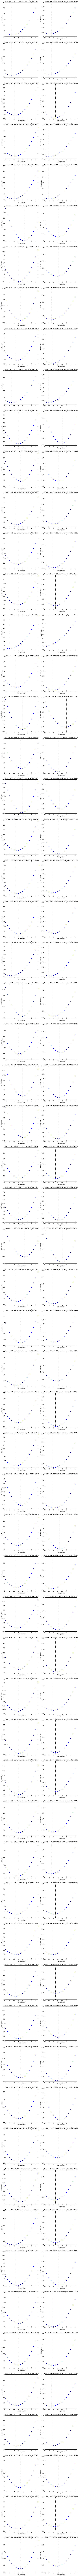

In [15]:
all_seg_ids = np.loadtxt(seg_file, delimiter=" ",dtype='S2')
count=1
plt.figure(1,figsize=[12,862])
plt.subplots_adjust(wspace = 0.2)
plt.subplots_adjust(hspace = 0.2)
for i, seg_id in enumerate(all_seg_ids):
    gal={}
    focus_stars={}
    for f, filter in enumerate(filters):
        file_name = main_path + str(seg_id) +'/' + filter + '_cost_fn.txt'
        cost_fn=np.loadtxt(file_name)
        file_name = main_path + str(seg_id) +'/' + filter + '_focus_with_num_stars.txt'
        a = np.loadtxt(file_name)
        plt.subplot(2*len(all_seg_ids),2,count)
        plt.axvline(x=a[-1][1],color='k', linestyle='--')
        plt.plot(cost_fn.T[0],cost_fn.T[1], 'o')
        plt.xlabel('focus position')
        plt.ylabel('cost function')
        plt.title('Focus = {0}  with {1} stars for seg {2} in filter {3}'.format(a[-1][1], int(a[-1][0]), seg_id,filter))
        plt.xlim([-10,5])
        count+=1

In [16]:
### Focus Offset as a function of number of stars used 

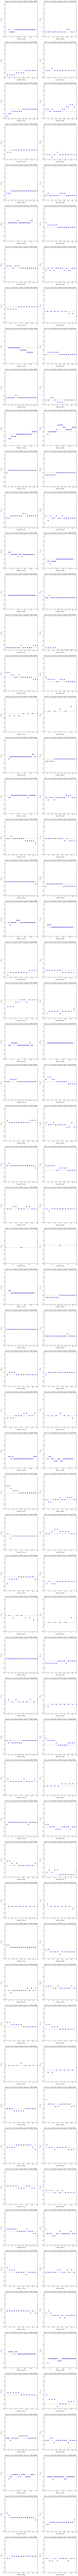

In [17]:
count=1
plt.figure(1,figsize=[12,862])
plt.subplots_adjust(wspace = 0.2)
plt.subplots_adjust(hspace = 0.2)
for i, seg_id in enumerate(all_seg_ids):
    stars = np.zeros([2,])
    gal={}
    focus_stars={}
    for f, filter in enumerate(filters):
        file_name = main_path + str(seg_id) +'/' + filter + '_focus_with_num_stars.txt'
        a = np.loadtxt(file_name)
        plt.subplot(2*len(all_seg_ids),2,count)
        cat_name = main_path + str(seg_id) +'/' + filter + '_full.cat'
        cat=Table.read(cat_name, format="ascii.basic")
        plt.axhline(y=cat['FOCUS'][0],color='k', linestyle='--')
        plt.plot(a.T[0],a.T[1], 's')
        plt.xlabel('Number of stars')
        plt.ylabel('Focus')
        plt.title('Focus vs no of stars used for seg {0} in filter {1}'.format(seg_id,filter))
        plt.ylim([-10,5])
        count+=1